# ML Task 2.5 - Visual weather systems - CNN

## Table of Contents

#### 01. Import libraries

#### 02. Import images dataset, normalize, split into train/test datasets, resize images

#### 03. Build, compile, run a CNN model

#### 04. Plot model learning curves: accuracy, loss

#### 05. Plot confusion matrix

#### 06. Display random images and associated predictions

### 01. Import libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
# from keras import Input # 'Input' imported below from tensorflow.keras.layers to avoid potential conflicts
from tensorflow.keras.models import Sequential # CORRECTED
from keras.models import Model
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout, Input # CORRECTED
# from keras.layers.core import Dense, Dropout # This does not work, outdated code
# from keras.utils import np_utils # This does not work, outdated code
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl # ADDED
from keras import utils # CORRECTED
from tensorflow.keras.utils import to_categorical # ADDED
from tensorflow.keras.preprocessing.image import ImageDataGenerator # CORRECTED
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

### 02. Import images dataset, normalize, split into train/test datasets, resize images

In [6]:
# Specify path to top-level folder, pull names of sub-directories and assign the list to a 'folders' variable
path = r'C:\Users\dirk8\OneDrive\Desktop\CF\MACHINE LEARNING WITH PYTHON\DATA FILES - EXERCISES - ML\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [13]:
# This code block creates 2 data generators from a single directory using the Keras ImageDataGenerator class
# This is a common and efficient way to handle image data for ML models, especially when the dataset is too large for memory
# rescale=1/255 normalizes the pixel values of the images, transforming these into a 0-1 scale ...
# ... where each pixel value is divided by 255, the 0-255 color range ceiling)
# validation_split=0.2 splits the dataset into 80/20 train/test proportions
# target_size=(250, 250) resizes all images to 250 x 250 pixels, ensuring a consistent input size for the model
# batch_size=32 forces the generator to run batches of 32 images at a time, which is more memory-efficient than importing the entire dataset at once
# subset='training' maps the train_generator to pull from the 80% of the dataset set aside for train by the validation_split parameter
# subset='validation' maps the test_generator to pull from the validation (test) 20% subset of the pre-split dataset

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


### 03. Build, compile, run a CNN model

In [20]:
# Build a CNN model to categorize the weather images

epochs = 60  # Set the epochs variable at top for clarity, select value
dropout_rate = 0.5  # Set the dropout_rate variable at top for clarity, select value
# Comment: 50% random deactivation of neurons (dropout) aims to reduce overfitting on this small dataset; a higher value might underfit the data
learning_rate = 0.001  # Set the learning_rate variable at top for clarity, select value
# Comment: 0.001 learning_rate is the default for the Adam optimizer, and will likely allow the model to converge within the selected 60 epochs

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(dropout_rate,seed=5)(x)  # The dropout_rate variable was specified at top for clarity
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [22]:
# Compile and run the CNN model
# How many epochs are required to generate an accurate model?

model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"]) # mean_squared_error
model.fit(
    train_generator, 
    epochs=epochs, # 60 epochs was selected earlier
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)

C:\Users\dirk8\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 757ms/step - accuracy: 0.6191 - loss: 0.8554 - val_accuracy: 0.6161 - val_loss: 1.0999
Epoch 2/60
 1/28 ━━━━━━━━━━━━━━━━━━━━ 7s 276ms/step - accuracy: 0.7500 - loss: 0.5242

C:\Users\dirk8\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7500 - loss: 0.5242 - val_accuracy: 0.6295 - val_loss: 1.1603
Epoch 3/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 376ms/step - accuracy: 0.7958 - loss: 0.5692 - val_accuracy: 0.7902 - val_loss: 0.5408
Epoch 4/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.6000 - loss: 0.5814 - val_accuracy: 0.8125 - val_loss: 0.5336
Epoch 5/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 375ms/step - accuracy: 0.8193 - loss: 0.4936 - val_accuracy: 0.7679 - val_loss: 0.5853
Epoch 6/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.8750 - loss: 0.3542 - val_accuracy: 0.7143 - val_loss: 0.6665
Epoch 7/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 376ms/step - accuracy: 0.8147 - loss: 0.4491 - val_accuracy: 0.8304 - val_loss: 0.4863
Epoch 8/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8438 - loss: 0.4593 - val_accuracy: 0.8080 - val_loss: 0.5193
Epoch 9/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 388ms/step - accuracy: 0.8654 - loss: 0.3720 - val_accuracy: 0.7768 - val_

#### Comment: 60 epochs were sufficient for convergence and reaching 90.6% / 86.6% train/test accuracy.  However, the "moderate" accuracy gap, both relative (proportionally) and absolute, confirms overfitting of the train data. Since hyperparameter tuning and full regularization were NOT conducted, this was a decent result.  Both hyperparameter tuning and regularization would help improve model accuracy and reduce the extent of overfit on train data.

### 04. Plot model learning curves: accuracy, loss

In [32]:
# Sanity check, prior to plotting learning curves

for key, value in model.history.history.items():
    print(f"{key}: {len(value)}")

accuracy: 60
loss: 60
val_accuracy: 60
val_loss: 60


In [34]:
# This converts the training history from a dictionary into a Pandas dataframe; makes the training metrics easier to analyze and visualize
results = pd.DataFrame(model.history.history)

#### Learning curves: loss function

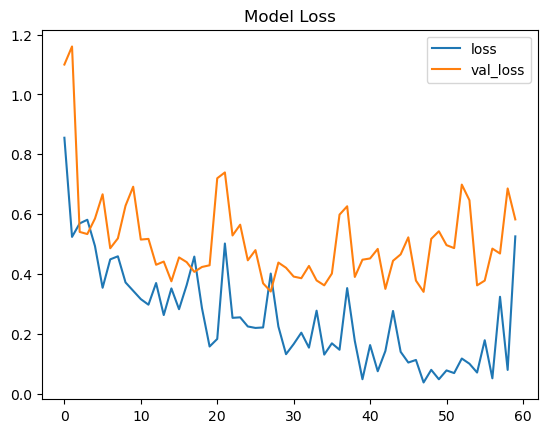

In [36]:
# Plot model learning curves for the loss function across all 60 epochs

results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

#### Learning curves: accuracy

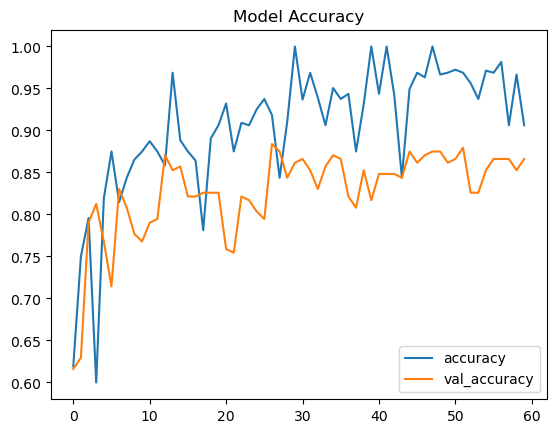

In [38]:
# Plot model learning curves for the overall accuracy score across all 60 epochs

results[['accuracy','val_accuracy']].plot(title='Model Accuracy')
plt.savefig('./accuracy.png')

#### Train/test(validation) accuracy and loss metrics

In [40]:
# Print the train/test(validation) accuracy and loss metrics

print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.90625, Val_Accuracy: 0.8660714030265808
Loss: 0.5258737206459045, Val_Loss: 0.5825900435447693


### 05. Plot confusion matrix

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


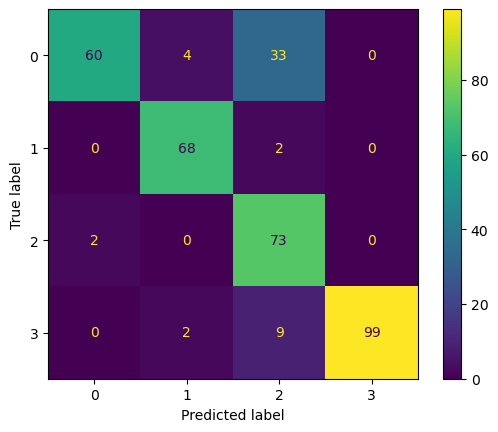

In [49]:
# Collect n batches of images and display the confusion matrix for them

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 # <--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### Comment: Prediction of the 'Shine' (2) class was the weakest, with 33 misclassifications of 'Cloudy' (0) as 'Shine' and 9 misclassifications of 'Sunrise' (3) as 'Shine'. Other predictions were relatively strong.  However, as mentioned neither hyperparameter tuning nor full regularization was conducted.

### 06. Display random images and associated predictions

In [52]:
# This function, when run, will display a number of random images and the associated predictions for the type of weather

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


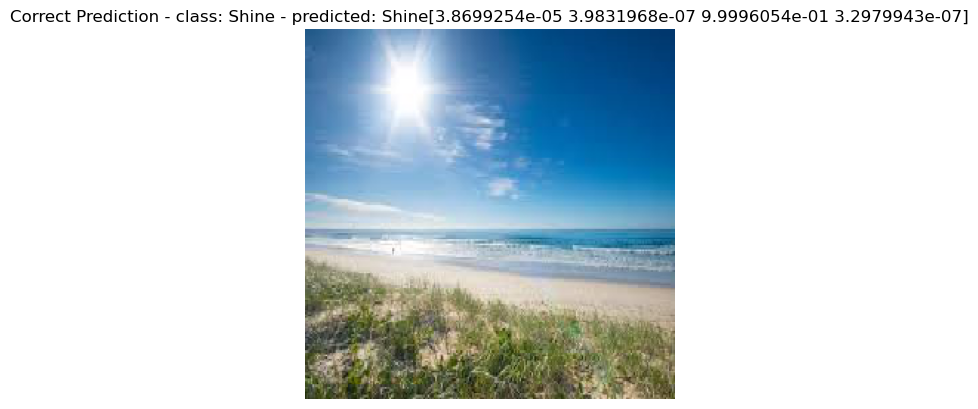

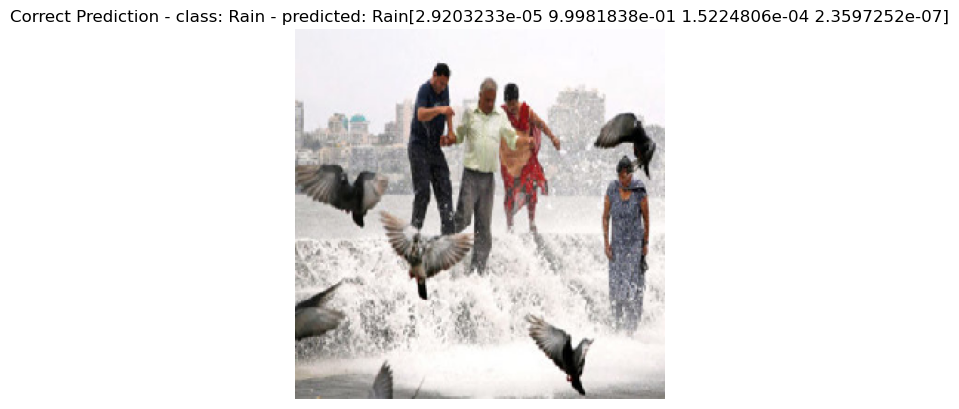

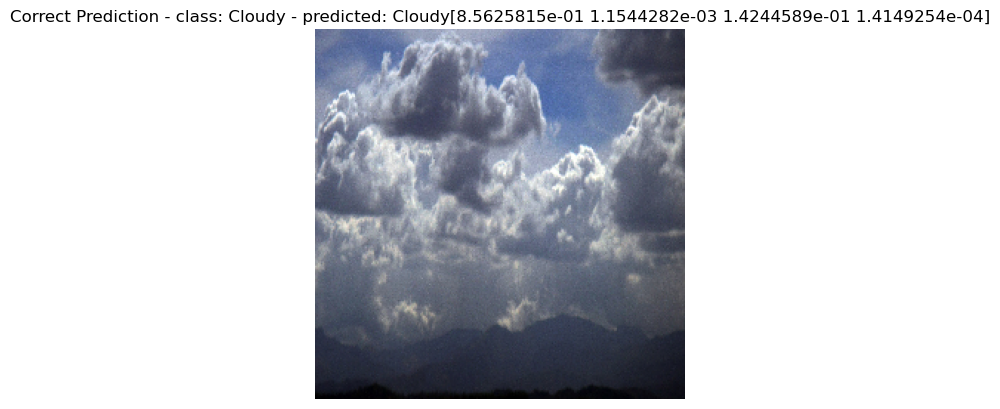

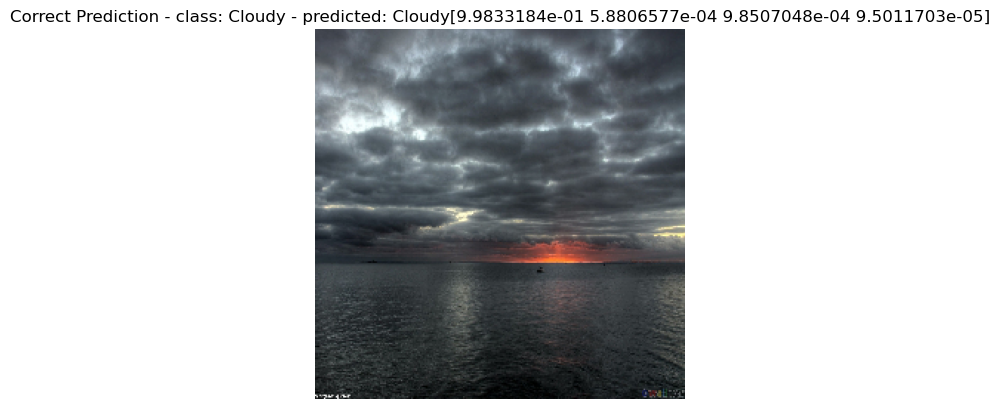

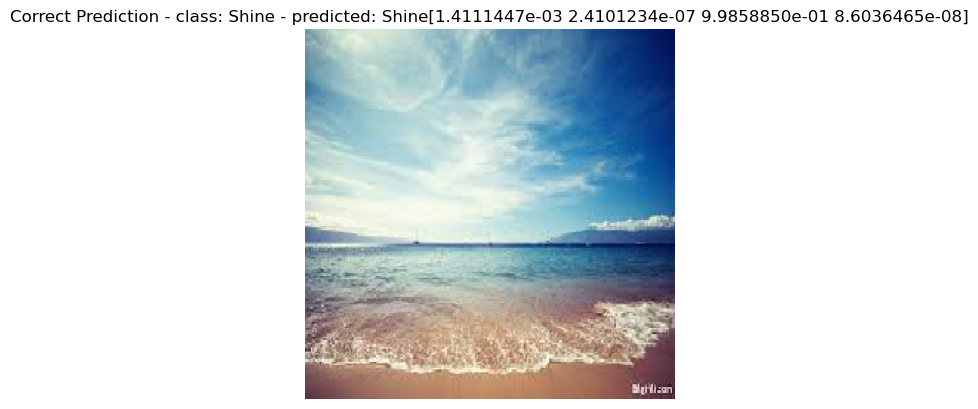

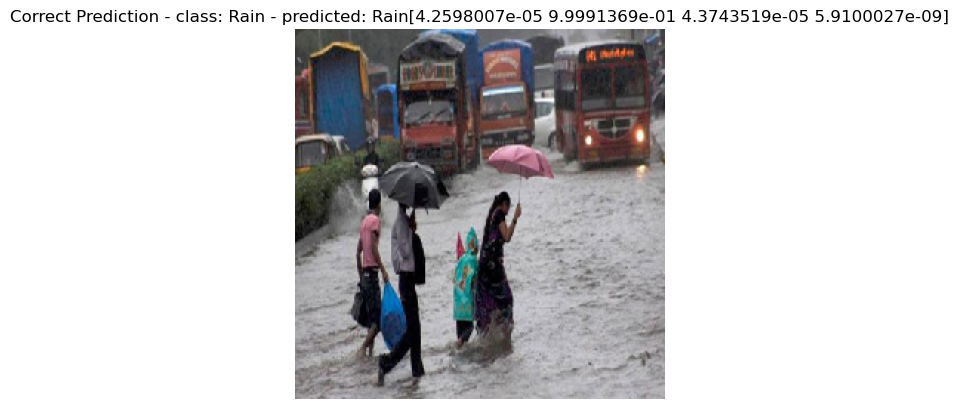

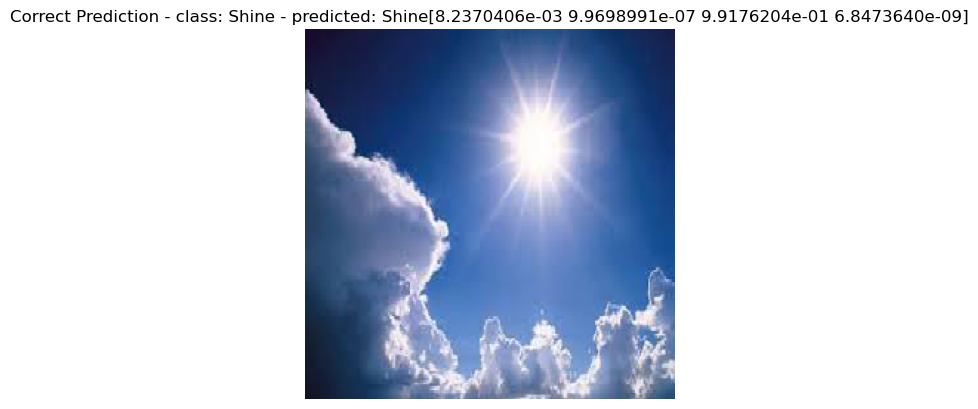

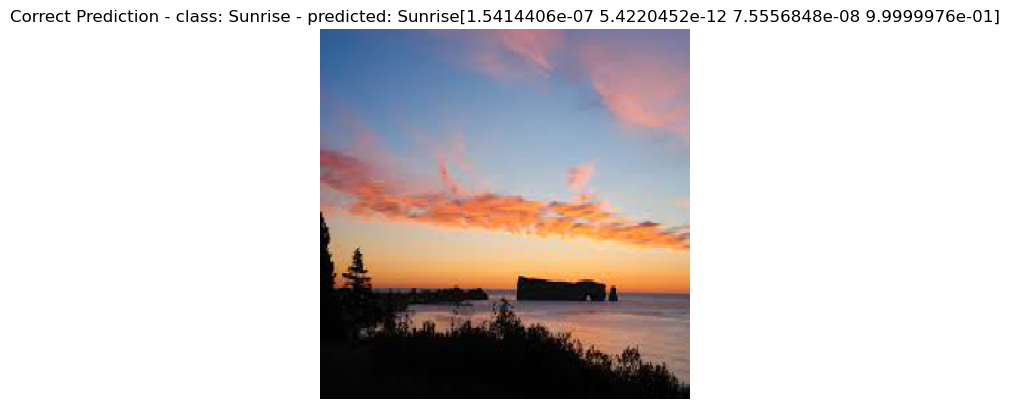

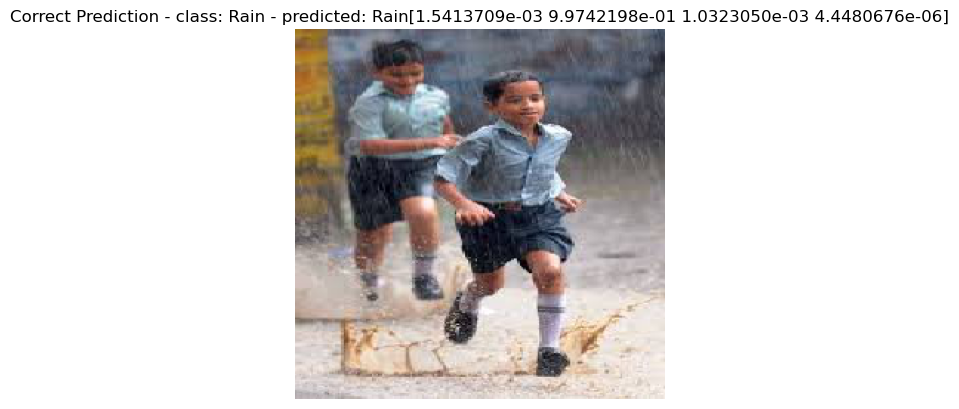

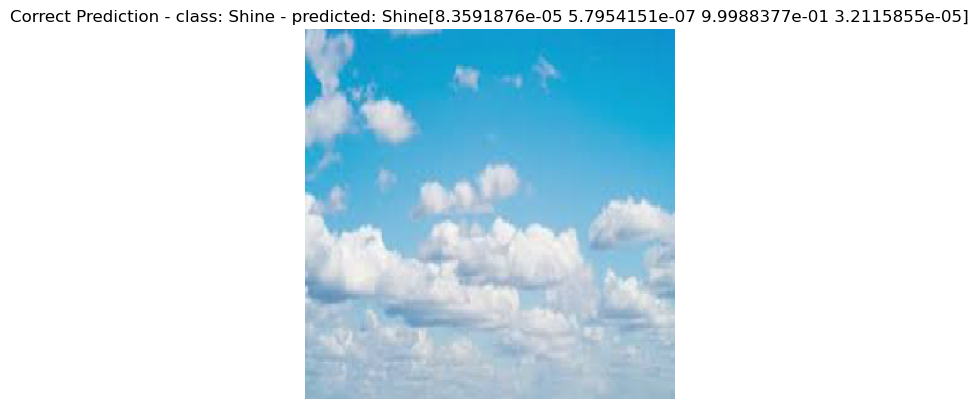

In [57]:
# Run the function to predict on 10 randomly-selected images

predict_one(model, 10) # Select number of random images to predict (classify)

### The CNN model correctly predicted (classified) 10 out of 10 randomly-selected images.